In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from scipy.stats import norm, normaltest, t, f_oneway, bartlett
from scipy.optimize import curve_fit
import seaborn as sns

pio.renderers.default='colab'
pio.templates.default = 'plotly'

In [3]:
aapl_df = pd.read_csv('AAPL.csv')  #################################################
btc_df = pd.read_csv('BTC.csv')  #################################################
gas_df = pd.read_csv('GAS.csv')  #################################################
aapl_df['date'] = aapl_df['date'].apply(lambda x: pd.to_datetime(x))
btc_df['date'] = btc_df['date'].apply(lambda x: pd.to_datetime(x))
gas_df['Date'] = gas_df['Date'].apply(lambda x: pd.to_datetime(x))

In [4]:
aapl_df

,date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2019-09-23,53.383072,53.600066,53.066113,53.326996,53.326996,76662000,0.0,0.0
1,2019-09-24,53.890204,54.246174,52.953959,53.073425,53.073425,124763200,0.0,0.0
2,2019-09-25,53.285552,54.004802,52.941773,53.890209,53.890209,87613600,0.0,0.0
3,2019-09-26,53.639082,53.868268,53.353820,53.612263,53.612263,75334000,0.0,0.0
4,2019-09-27,53.770740,53.873145,52.975908,53.351383,53.351383,101408000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
863,2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500,0.0,0.0
864,2023-02-28,147.050003,149.080002,146.830002,147.410004,147.410004,50547000,0.0,0.0
865,2023-03-01,146.830002,147.229996,145.009995,145.309998,145.309998,55479000,0.0,0.0
866,2023-03-02,144.380005,146.710007,143.899994,145.910004,145.910004,52279800,0.0,0.0


Были проблемы с отображением ([решение???](https://stackoverflow.com/questions/57450868/plotly-express-is-not-rendered-in-jupyter-lab), [да](https://github.com/plotly/plotly.py/blob/master/packages/python/plotly/plotly/io/_renderers.py))

In [5]:
fig = px.scatter(data_frame=aapl_df, x='date', y='Adj Close', trendline='ols', title='AAPL')
fig


In [6]:
fig = px.scatter(data_frame=btc_df, x='date', y='Close', trendline='ols', title='BTC')
fig.show()


In [7]:
fig = px.scatter(data_frame=gas_df, x='Date', y='Close', trendline='ols', title='GAS(N.NG)')
fig.show()


In [8]:
# на основе Close извлеките логарифмическую доходность BTC task1, ответ – мю и сигма
# проверьте распределение получившихся данных BTC task2, ответ yes/no 
# возмонжо попробуйте их (BTC) нормализовать task3, ответ – mu и sigma
# попробуйте предположить по подвыборке размером 634 дней среднее значение для доходностей (BTC) на уровне 90 95 99 – task 4, ответ – val + [a;b]

# тесты для этих заданений (как это статистически значимо)
# проверьте корреляцию доходностей BTC & AAPL – task5, ответ – yes/no
# проверьте гипотезу о равенствен средних и дисперсии доходностей BTC & AAPL & GAS – task6, ответ – yes/no

# Task 1

In [10]:
btc_df['log_close_return'] = btc_df['Close'].apply(np.log).diff(1) # однодневная лог-доходность

log_returns_btc = btc_df['log_close_return'][1:].values
mu_btc = log_returns_btc.mean()
sigma_btc = log_returns_btc.std()

print(f"mean log btc = {'%s' % float('%.3g' % mu_btc)},\nstd log bts = {'%s' % float('%.3g' % sigma_btc)}")

mean log btc = 0.000663,
std log bts = 0.0387


In [11]:
btc_df

,date,Open,High,Low,Close,Volume,log_close_return
0,2019-09-23,10028.05,10049.99,9615.77,9702.25,31937.232356,NaN
1,2019-09-24,9702.20,9794.99,7800.00,8493.14,94007.345203,-0.133099
2,2019-09-25,8497.55,8730.00,8215.64,8430.05,60783.892258,-0.007456
3,2019-09-26,8430.05,8465.99,7750.00,8063.73,67930.853749,-0.044426
4,2019-09-27,8063.49,8265.00,7852.15,8177.91,43882.924625,0.014060
...,...,...,...,...,...,...,...
1254,2023-02-28,23492.09,23600.00,23020.97,23141.57,264140.998940,-0.015033
1255,2023-03-01,23141.57,24000.00,23020.03,23628.97,315287.417370,0.020843
1256,2023-03-02,23629.76,23796.93,23195.90,23465.32,239315.452190,-0.006950
1257,2023-03-03,23465.32,23476.95,21971.13,22354.34,319954.197850,-0.048503


# Task 2

$H_0$ - данные распределены нормально

$H_1$ - данные не распределены нормально

In [12]:
# Для проверки равенства распределениия нормальному
# https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test, https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

p_value = normaltest(log_returns_btc)[1]
if p_value < 0.05: # сравнеие с уровнем значимости 0.05
    q2_ans = 'no'
else:
    q2_ans = 'yes'

q2_ans

'no'

Отвергаем нулевую гипотезу (т.к. `q2_ans = no`) $\Rightarrow$ Данные имеют не нормальное распределение (принимаем альтернативную гипотезу $H_1$)

Проверим нормальность данных еще и на тесте [Шапиро-Вилка](https://en.wikipedia.org/wiki/Shapiro–Wilk_test) с аналогичными гипотезапи и уровнем значимости

In [13]:
from scipy.stats import shapiro

# проверка с тестом Шапиро-Уилка
stat, p_value = shapiro(log_returns_btc)
print(f'{p_value = }')
print(f'{stat = }')
print('-'*50)
print(f'Данные распределены нормально? Ans: {p_value > 0.05}')

p_value = 6.439466387363863e-30
stat = 0.8816497921943665
--------------------------------------------------
Данные распределены нормально? Ans: False


Как видно `p_value` > 0.05, то есть этот тест тоже опровергает нормальность распределения нашей выборки на уровне значимости 0.05

Проверим тестом [Колмогорова-Смирнова](https://en.wikipedia.org/wiki/Kolmogorov–Smirnov_test) с аналогичными гипотезапи и уровнем значимости

In [14]:
from scipy.stats import kstest
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

stat, p_value = kstest(log_returns_btc, 'norm')
print(f'{p_value = }')
print(f'{stat = }')
print('-'*50)
print(f'Данные распределены нормально? Ans: {p_value > 0.05}')

p_value = 2.1637256571913848e-234
stat = 0.4512708392339002
--------------------------------------------------
Данные распределены нормально? Ans: False


In [15]:
# график для (визуального) сравнеия с нормальным распределением

loc, scale = norm.fit(log_returns_btc)

fig = px.histogram(log_returns_btc, nbins=150)
fig.add_trace(go.Scatter(x=log_returns_btc, y=norm.pdf(log_returns_btc, loc=loc, scale=scale), mode="markers"))
fig.show()

Таким образом все тесты опровергли нулевую гипотезу и поэтому мы считем, что на уровне значимости 0.05 данные имеют не нормальное распределение.

# Task 3

In [16]:
# нормализация выборки
norm_log_btc = (log_returns_btc - mu_btc) / sigma_btc
mu_lb_norm = norm_log_btc.mean()
sigma_lb_norm = norm_log_btc.std()

print(f"mean norm_log_btc = {'%s' % float('%.3g' % mu_lb_norm)},\nstd z_norm = {'%s' % float('%.3g' % sigma_lb_norm)}")

mean norm_log_btc = -1.13e-17,
std z_norm = 1.0


In [17]:
p_value = normaltest(norm_log_btc)[1]
if p_value < 0.05:
    q3_ans = 'no'
else:
    q3_ans = 'yes'

q3_ans

'no'

In [18]:
from scipy.stats import shapiro

# проверка с тестом Шапиро-Уилка
stat, p_value = shapiro(norm_log_btc)
print(f'{p_value = }')
print(f'{stat = }')
print('-'*50)
print(f'Данные распределены нормально? Ans: {p_value > 0.05}')

p_value = 6.439676283635146e-30
stat = 0.881649911403656
--------------------------------------------------
Данные распределены нормально? Ans: False


Даже для нормализированных данных тест на данном уровне значимости отвергает нулевую гипотезу в пользу алтернативной

In [19]:
# визуальное сравнение после нормализации
loc, scale = norm.fit(norm_log_btc)

fig = px.histogram(norm_log_btc, nbins=150, histnorm='probability density')
fig.add_trace(go.Scatter(x=norm_log_btc, y=norm.pdf(norm_log_btc, loc=loc, scale=scale), mode="markers"))
fig.show()

# Task 4

In [20]:
n = 634
log_returns_btc_sample = log_returns_btc[:n] # не буду брать случайные, так как у нас есть дата

mu_sample = log_returns_btc_sample.mean()
sigma_sample = log_returns_btc_sample.std()
print(f"mean log_returns_btc_sample = {'%s' % float('%.5g' % mu_sample)},\nstd log_returns_btc_sample = {'%s' % float('%.4g' % sigma_sample)}")

bettas = [.90, .95, .99]
alpha2tails = [1 - alpha / 2 for alpha in bettas]

z_s = norm.ppf(alpha2tails, mu_sample, sigma_sample) # значения Z-критерия для уровней доверия 90%, 95%, 99%
d_s = z_s * sigma_btc / np.sqrt(n)

ints = [[mu_sample - d, mu_sample + d] for d in d_s]

for level, interval in zip([90, 95, 99], ints):
    print(f"Уровень доверия {level}%: {interval}")

mean log_returns_btc_sample = 0.0020602,
std log_returns_btc_sample = 0.04298
Уровень доверия 90%: [0.0020487049116572975, 0.0020716235188483955]
Уровень доверия 95%: [0.002052860703495567, 0.002067467727010126]
Уровень доверия 99%: [0.0020561727716948697, 0.0020641556588108234]


То есть среднее попадает в 90%, 95%, 99% доверительные интервалы

# Task 5

In [21]:
aapl_df

,date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2019-09-23,53.383072,53.600066,53.066113,53.326996,53.326996,76662000,0.0,0.0
1,2019-09-24,53.890204,54.246174,52.953959,53.073425,53.073425,124763200,0.0,0.0
2,2019-09-25,53.285552,54.004802,52.941773,53.890209,53.890209,87613600,0.0,0.0
3,2019-09-26,53.639082,53.868268,53.353820,53.612263,53.612263,75334000,0.0,0.0
4,2019-09-27,53.770740,53.873145,52.975908,53.351383,53.351383,101408000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
863,2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500,0.0,0.0
864,2023-02-28,147.050003,149.080002,146.830002,147.410004,147.410004,50547000,0.0,0.0
865,2023-03-01,146.830002,147.229996,145.009995,145.309998,145.309998,55479000,0.0,0.0
866,2023-03-02,144.380005,146.710007,143.899994,145.910004,145.910004,52279800,0.0,0.0


In [22]:
aapl_df['log_close_return'] = aapl_df['Close'].apply(np.log).diff(1)

In [23]:
aapl_df

,date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,log_close_return
0,2019-09-23,53.383072,53.600066,53.066113,53.326996,53.326996,76662000,0.0,0.0,NaN
1,2019-09-24,53.890204,54.246174,52.953959,53.073425,53.073425,124763200,0.0,0.0,-0.004766
2,2019-09-25,53.285552,54.004802,52.941773,53.890209,53.890209,87613600,0.0,0.0,0.015272
3,2019-09-26,53.639082,53.868268,53.353820,53.612263,53.612263,75334000,0.0,0.0,-0.005171
4,2019-09-27,53.770740,53.873145,52.975908,53.351383,53.351383,101408000,0.0,0.0,-0.004878
...,...,...,...,...,...,...,...,...,...,...
863,2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500,0.0,0.0,0.008214
864,2023-02-28,147.050003,149.080002,146.830002,147.410004,147.410004,50547000,0.0,0.0,-0.003454
865,2023-03-01,146.830002,147.229996,145.009995,145.309998,145.309998,55479000,0.0,0.0,-0.014348
866,2023-03-02,144.380005,146.710007,143.899994,145.910004,145.910004,52279800,0.0,0.0,0.004121


In [24]:
log_returns_aapl = aapl_df['Close'].apply(np.log).diff(1).dropna()

fig = go.Figure()
fig.add_trace(go.Scatter(x=aapl_df['date'][1:], y=log_returns_aapl.values, name='AAPL', mode='lines'))
fig.add_trace(go.Scatter(x=btc_df['date'][1:], y=log_returns_btc, name='BTC', mode='lines'))

In [25]:
lr_btc = btc_df[btc_df['date'].isin(aapl_df['date'])]['log_close_return'].dropna().values

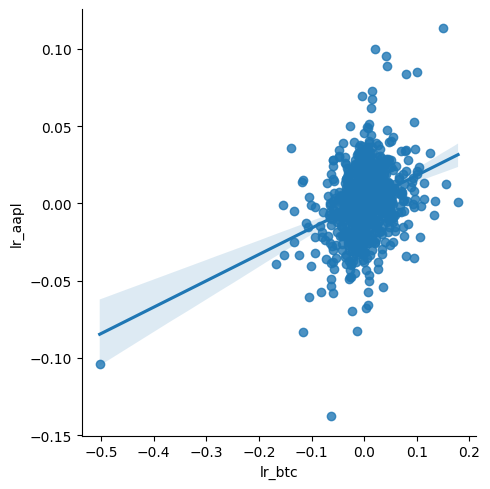

In [26]:
df0 = pd.DataFrame({'lr_btc': lr_btc, 'lr_aapl': log_returns_aapl})
sns.lmplot(data=df0, x='lr_btc', y='lr_aapl');

Если использовать коэффициент корреляции [Присона](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

In [27]:
from scipy.stats import pearsonr
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

corr, p_value = pearsonr(log_returns_aapl, lr_btc)

print(f'{corr = }, {p_value = }')

corr = 0.3308814327262133, p_value = 1.3489920590190948e-23


То есть корреляция умеренная

Оценим достоверность коэффициента корреляции

In [28]:
# t_crit = stats.t.ppf(1 - 0.05 / 2, df=len(log_returns_aapl) - 1)
t_r = corr * np.sqrt((len(log_returns_aapl) - 2) / (1 - corr**2))

# Для уровня значимости alpha=0,05 критическое значение
# критерия Стьюдента равно t_crit = 1.6495996

t_crit = 1.6495996
print(f'Коэффициент корреляции имеет статистическую важность? Ans: {t_r >= t_crit}')

Коэффициент корреляции имеет статистическую важность? Ans: True


In [29]:
q5_ans = 'yes'

# Task 6

In [30]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html


log_returns_gas = gas_df['Close'].apply(np.log).diff(1).dropna()

_, p_value_mean = f_oneway(log_returns_btc, log_returns_aapl, log_returns_gas)

_, p_value_var = bartlett(log_returns_btc, log_returns_aapl, log_returns_gas)

if p_value_mean < 0.05:
    q6_ans_mean = 'no'
else:
    q6_ans_mean = 'yes'

if p_value_var < 0.05:
    q6_ans_var = 'no'
else:
    q6_ans_var = 'yes'

# Answers

In [31]:
ANSWERS = {
    'tasks' : {
        'task1_mu' : {
            "answer" : mu_btc
        }, 
        'task1_sigma' : {
            "answer" : sigma_btc
        }, 
        'task2_normal' : {
            'answer' : q2_ans
        }, 
        'task3_mu' : {
            "answer" : mu_lb_norm
        }, 
        'task3_sigma' : {
            "answer" : sigma_lb_norm
        }, 
        'task4_90' : {
            "answer" : mu_sample
        }, 
        'task4_90_int' : {
            "answer" : ints[0]
        }, 
        'task4_95' : {
            "answer" : mu_sample
        }, 
        'task4_95_int' : {
            "answer" : ints[1]
        }, 
        'task4_99' : {
            "answer" : mu_sample
        }, 
        'task4_99_int' : {
            "answer" : ints[-1]
        }, 
        'task5_corr' : {
            "answer" : q5_ans
        },
        'task6_corr_mu' : {
            "answer" : q6_ans_mean
        },
        'task6_corr_sigma' : {
            "answer" : q6_ans_var
        }
    }
}


In [ ]:
import yaml
yaml_result = yaml.dump(ANSWERS)

print(yaml_result)

with open(f"hw03.yaml", "w") as f:
    f.write(yaml_result)